<a href="https://colab.research.google.com/github/Ivonne-Rojas/Simulation-of-Different-Age-Distributions-for-the-Analysis-of-the-Aging-Curve-of-a-Population-of-S./blob/main/RLS_Comparison_with_the_article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import collections as coll 
import random
import openpyxl
from openpyxl import load_workbook
from time import time
from timeit import timeit
from scipy.interpolate import interp1d # para el analisis de datos, regresion 	
from scipy.optimize import curve_fit

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import collections as coll 
import random
from scipy import stats
import seaborn as sns  
from scipy.special import ndtri

In [ ]:
tiempo_inicial = time() 
wb = openpyxl.load_workbook ("250mil tiempos.xlsx")
hoja = wb['Hoja1']

l = []
#hoja.iter_rows()
for row in hoja['A1':'A99']:
  v = row[0].value
  l.append(v)
#print(L[0])
print(len(l))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print(tiempo_ejecucion)

In [ ]:
tiempo_inicial = time()# libreria para calcular el tiempo de ejecucion  
#-------------------------------------------------------------------------------
#variables 
s=[]#para guardar los tiempos aleatorios de replicacion
R=0
celulas=[]
zi=[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]# matrix inicial  
t=0 # tiempo que ha pasado  
tr=[]#lista para guardar t (tiempo total )
m=20 # si se muere en uno menos del numero  
muertes=0# variable para contabilizar el numero de celulas muertas y no viables 
fraccion=[]
suma=[]# lista para guardar el numero total de celulas o la suma de la matriz 
r=0 # crecimiento per capita
#------------------------------------------------------------------------------- 
#primer for que hace los nacimientos y corre los numeros 
for j in range(30):# numero de iteraciones o numero de generaciones la cual se va realizar 
  zf=np.zeros(m,dtype=np.int64) # tiene que tener una longitud definida la cual sera la generacion en la que se mueran las celulas
  for i in range(m-1): # numero menor al numero de generaciones 
    zf[i+1]= zi[i]
    zf[0]=sum(zi)-zi[-1]
  zi=zf
#-------------------------------------------------------------------------------
#asincronico 
  #s=[]#para guardar los tiempos aleatorios de replicacion
  #for k in range(zi[0]):
    #R=random.choice(l)
    #s.append(R) 
#-------------------------------------------------------------------------------
#sincronico 
  #R=R+120
  #s.append(R)
  #celulas.append(sum(zi)) 
#-------------------------------------------------------------------------------
  #t=t+max(s)    # tiempo total que se ha demorado las celulas en cada iteracion 
  #tr.append(t)
#-------------------------------------------------------------------------------
#calculos 
  muertes=muertes+zf[-1]#para guardas las celulas muertas
  total_celulas= sum(zi)+muertes #total de celulas teniendo en cuenta las muertes para sacar la fraccion de celulas viables 
  fraccion_viables= (sum(zi)-zi[-1])/total_celulas
  fraccion.append(fraccion_viables)
  r=zi[0]-muertes # numero de nacimientos menos numero de muertes 
#-------------------------------------------------------------------------------
  total=sum(zi)#numero total de celulas viables
  suma.append(total)
#-------------------------------------------------------------------------------
  print(zi)
  #print('s',s)
  #print('tiempo',t)
  #print('lista tiempo',tr)
  print('No viable', muertes)
  #print('Crecimiento per capita', r)
  #print('total de celulas vivas', total)
  #print('total celulas',total_celulas)
  #print('fraccion',fraccion_viables)
  #print(fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(zi))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('tiempo de ejecucion',tiempo_ejecucion)

[1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[8 4 2 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
No viable 0
---------------
[16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[64 32 16  8  4  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
No viable 0
---------------
[128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0   0
   0   0]
No viable 0
---------------
[256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0   0
   0   0]
No viable 0
---------------
[512 256 128  64  32  16   8   4   2   1   1   0   0   0   0   0   0   0
   0   0]
No viable 0
---------------
[1024  512  256  128   64   32   16    8    4    2    1    1    0    0
    0    0    0    0    0    0]
No viable 0
--

In [ ]:
indice=[]#edades
ind=-1
for i in range(len(zi)):
  ind=ind+1
  indice.append(ind)
print(indice)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
dic= dict(zip(zi,indice))# diccionario con la edad y el numero de celulas en esa edad distribucion de edades 
print(dic)# NC y edad 

{536864768: 0, 268432640: 1, 134216448: 2, 67108288: 3, 33554176: 4, 16777104: 5, 8388560: 6, 4194284: 7, 2097144: 8, 1048573: 9, 524287: 10, 262144: 11, 131072: 12, 65536: 13, 32768: 14, 16384: 15, 8192: 16, 4096: 17, 2048: 18, 1024: 19}


Probabilidad

In [ ]:
P=[] # me guarda las probabilidades de cada edad de la distribucion 
for i in zi:
  p=i/total_celulas # se tiene en cuentas las celulas que ya se murieron 
  P.append(p)
print(P)

[0.49999904631658854, 0.24999976157914713, 0.125, 0.06250005960521321, 0.031250059605213217, 0.01562504470390991, 0.007812529802606608, 0.00390626862662913, 0.0019531361759774777, 0.0009765690193201954, 0.0004882849753258259, 0.0002441429533286412, 0.0001220714766643206, 6.10357383321603e-05, 3.051786916608015e-05, 1.5258934583040076e-05, 7.629467291520038e-06, 3.814733645760019e-06, 1.9073668228800095e-06, 9.536834114400048e-07]


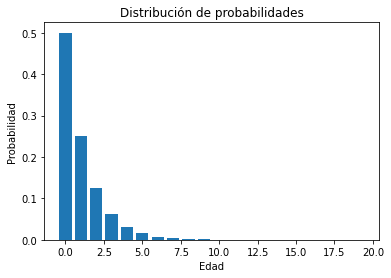

In [ ]:
fig, ax = plt.subplots() # coloca los letreros  
ax.set_ylabel('Probabilidad')
ax.set_xlabel('Edad')
ax.set_title('Distribución de probabilidades')
plt.bar(indice, P)
#plt.savefig('barras_simple.png')
plt.show()

In [ ]:
sample= random.choices(indice,weights=P,k=180)   # me genera una muestra de celulas 
print(sample)# cero significa que tiene edad cero 

[0, 2, 5, 1, 4, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 5, 1, 7, 0, 0, 4, 3, 0, 1, 0, 2, 1, 0, 0, 3, 0, 1, 0, 3, 0, 2, 0, 0, 4, 0, 1, 0, 0, 2, 0, 0, 3, 3, 0, 2, 0, 5, 0, 0, 2, 0, 1, 0, 3, 1, 10, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 1, 0, 1, 1, 2, 1, 1, 0, 1, 0, 3, 2, 2, 1, 0, 1, 0, 1, 2, 0, 0, 2, 1, 1, 0, 0, 6, 0, 2, 2, 4, 1, 1, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 3, 1, 0, 5, 1, 1, 2, 1, 1, 4, 2, 0, 0, 1, 0, 3, 1, 0, 1, 1, 2, 1, 3, 0, 1, 0]


In [ ]:
 print(coll.Counter(sample)) #cuantas celulas fueron elegidas de esa edad {edad: numero de celulas}

Counter({0: 81, 1: 52, 2: 23, 3: 11, 4: 6, 5: 4, 7: 1, 10: 1, 6: 1})


Convolución 

In [ ]:
lista=[0,1,2,3,4,5,6,7]

In [ ]:
Dic= coll.Counter(sample)
Dics=sorted(Dic)
print(Dics)

[0, 1, 2, 3, 4, 5, 6, 7, 10]


In [ ]:
valores_ord = coll.OrderedDict(sorted(Dic.items()))
print(valores_ord)
print(valores_ord[0])

OrderedDict([(0, 81), (1, 52), (2, 23), (3, 11), (4, 6), (5, 4), (6, 1), (7, 1), (10, 1)])
81


In [ ]:
valores=valores_ord.values()
llaves=valores_ord.keys()
Ncell=[]
Edad=[]
for i in valores:
  Ncell.append(i)
print('Numero de celulas',Ncell)
for j in llaves:
  Edad.append(j)
print('Edades',Edad)
print(sum(Ncell))

Numero de celulas [81, 52, 23, 11, 6, 4, 1, 1, 1]
Edades [0, 1, 2, 3, 4, 5, 6, 7, 10]
180


In [ ]:
inicial1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(9):
  if i==Edad[i]:
    inicial1[i]=Ncell[i]
  else:
    inicial1[i]=0
    inicial1[i+2]=Ncell[i]
    #print(inicial1)
print(inicial1)

[81, 52, 23, 11, 6, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[81, 52, 23, 11, 6, 4, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
tiempo_inicial = time()# libreria para calcular el tiempo de ejecucion  
#-------------------------------------------------------------------------------
#variables 
s_1=[]#para guardar los tiempos aleatorios de replicacion
R_1=0
celulas_1=[]
t_1=0 # tiempo que ha pasado  
tr_1=[]#lista para guardar t (tiempo total )
m_1=15 # si se muere en uno menos del numero  
muertes_1=0# variable para contabilizar el numero de celulas muertas y no viables 
fraccion_1=[]
suma_1=[]# lista para guardar el numero total de celulas o la suma de la matriz 
r_1=0 # crecimiento per capita
#------------------------------------------------------------------------------- 
#primer for que hace los nacimientos y corre los numeros 
for j_1 in range(5):# numero de iteraciones o numero de generaciones la cual se va realizar 
  zf_1=np.zeros(m,dtype=np.int64) # tiene que tener una longitud definida la cual sera la generacion en la que se mueran las celulas
  for i_1 in range(m_1-1): # numero menor al numero de generaciones 
    zf_1[i_1+1]= inicial1[i_1]
    zf_1[0]=sum(inicial1)-inicial1[-1]
  inicial1=zf_1
#-------------------------------------------------------------------------------
#asincronico 
  #s=[]#para guardar los tiempos aleatorios de replicacion
  #for k in range(zi[0]):
    #R=random.choice(l)
    #s.append(R) 
#-------------------------------------------------------------------------------
#sincronico 
  #R=R+120
  #s.append(R)
  #celulas.append(sum(zi)) 
#-------------------------------------------------------------------------------
  #t=t+max(s)    # tiempo total que se ha demorado las celulas en cada iteracion 
  #tr.append(t)
#-------------------------------------------------------------------------------
#calculos 
  muertes_1=muertes_1+zf_1[-1]#para guardas las celulas muertas
  total_celulas_1= sum(inicial1)+muertes_1 #total de celulas teniendo en cuenta las muertes para sacar la fraccion de celulas viables 
  fraccion_viables_1= (sum(inicial1)-inicial1[-1])/total_celulas_1
  fraccion.append(fraccion_viables_1)
  r_1=inicial1[0]-muertes_1 # numero de nacimientos menos numero de muertes 
#-------------------------------------------------------------------------------
  total_1=sum(inicial1)#numero total de celulas viables
  suma.append(total_1)
#-------------------------------------------------------------------------------
  print(inicial1)
  #print('s',s)
  #print('tiempo',t)
  #print('lista tiempo',tr)
  print('No viable', muertes_1)
  #print('Crecimiento per capita', r)
  #print('total de celulas vivas', total)
  #print('total celulas',total_celulas)
  #print('fraccion',fraccion_viables)
  #print(fraccion)
  print('---------------')
#-------------------------------------------------------------------------------
print(len(inicial1))
tiempo_final = time()
tiempo_ejecucion = tiempo_final - tiempo_inicial
print('tiempo de ejecucion',tiempo_ejecucion)

[2879 1440  720  360  180   81   52   23   11    6    4    1    1    0
    0]
No viable 0
---------------
[5758 2879 1440  720  360  180   81   52   23   11    6    4    1    1
    0]
No viable 0
---------------
[11516  5758  2879  1440   720   360   180    81    52    23    11     6
     4     1     1]
No viable 1
---------------
[23031 11516  5758  2879  1440   720   360   180    81    52    23    11
     6     4     1]
No viable 2
---------------
[46061 23031 11516  5758  2879  1440   720   360   180    81    52    23
    11     6     4]
No viable 6
---------------
15
tiempo de ejecucion 0.006261348724365234


In [ ]:
valores=Dic.values()
llaves=Dic.keys()
Ncell=[]
Edad=[]
for i in valores:
  Ncell.append(i)
print('Numero de celulas',Ncell)
for j in llaves:
  Edad.append(j)
print('Edades',Edad)
print(sum(Ncell))

Numero de celulas [93, 46, 16, 12, 7, 4, 1, 1]
Edades [0, 1, 2, 3, 4, 6, 8, 5]
180




---



---



In [ ]:
repetido=[]# hace lo mismo que el codigo coll.counter pero mal jajajaja 
for i in sample:
  rep=sample.count(i)
  repetido.append(rep)
print(repetido)



---



---



Simulacion de la curva de envejecimiento

In [ ]:
R=[]#Me crea una lista de numeros aleatorios entre cero y uno 
for i in range(180):
  r=random.random()
  R.append(r)
print(R)
print(len(R))

[0.33636618599059653, 0.8246125968080201, 0.7417982422177326, 0.7431995634534985, 0.1295779959315181, 0.29618595008091797, 0.7965872317647106, 0.45520633065087057, 0.8338308990397518, 0.22749555688376444, 0.5840354434574271, 0.3526736858291978, 0.33969402016766603, 0.15062334482601492, 0.25795468234481034, 0.8661648604982495, 0.38553719940631326, 0.5628066297853662, 0.9721854269318297, 0.9172649672161685, 0.33396253878343185, 0.38179216925417825, 0.5977291108390845, 0.25594384632466705, 0.29435735580838485, 0.024107153511677692, 0.328645686891764, 0.2133758966564545, 0.8320039178979186, 0.10144908223189397, 0.8874870402964229, 0.6985717652702345, 0.7324871678624033, 0.5587829077128574, 0.5412565259141434, 0.7663645020252945, 0.11746086909012043, 0.6218409497736287, 0.5142864954872155, 0.8612078294306581, 0.23751494275132978, 0.9339797046299625, 0.08768239036416892, 0.9597917124430824, 0.6601130560789793, 0.9137104661941026, 0.49142523522007553, 0.1535749713869785, 0.6626771562461397, 0

In [ ]:
for i in R:
  p=stats.norm.ppf(R, loc=19, scale=2)# loc es la media y scale la desviacion estandar 
print(p) # Devuelve el inverso de la distribución normal acumulativa donde R es el numero aleatorio, loc es la media y scale la desviacion estandar
print(len(p))# creo que me devuelve un aaray 

[18.15519807 20.86617495 20.29779845 20.30648215 16.74322352 17.92919598
 20.65898586 18.77496391 20.93882988 17.50575995 19.42445613 18.24377594
 18.1734033  16.93247279 17.70067225 21.21688722 18.41806035 19.31617782
 22.82785929 21.77381438 18.14200509 18.39844545 19.49494705 17.68819759
 17.91860097 15.04905067 18.11268817 17.41047543 20.92422871 16.45332421
 21.42654361 20.04059434 20.24070522 19.29576833 19.2071996  20.45385296
 16.62444833 19.62063875 19.07163718 21.17152383 17.5713618  22.01220712
 16.28966867 22.49654821 19.8255434  21.72792691 18.95700919 16.95755883
 19.83956134 23.16597154 18.98131392 21.40557268 22.43841647 17.20081538
 19.21567063 20.81579796 18.65620933 20.70588146 16.51796717 19.81563867
 18.37802042 19.22868652 21.73176832 17.21718655 21.26942564 19.27582418
 21.69236336 17.92905793 15.79028157 15.08262398 17.26593317 16.25756012
 21.72862495 19.0348947  21.97655925 16.52445538 13.47181411 22.14689646
 18.41740552 18.46025995 20.39516861 14.74106849 15

Para descontar las distribución de edades

In [ ]:
p_1=p[0:Ncell[0]]
p_2=p[Ncell[0]:Ncell[1]+Ncell[0]]
p_3=p[Ncell[1]+Ncell[0]:(Ncell[2]+Ncell[1]+Ncell[0])]
p_4=p[(Ncell[2]+Ncell[1]+Ncell[0]):(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[0])]
p_5=p[(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[0]):(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[0])]
p_6=p[(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[0]):(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[0])]
p_7=p[(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[0]):(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[6]+Ncell[0])]
p_8=p[(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[6]+Ncell[0]):(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[6]+Ncell[0]+Ncell[7])]
#p_9=p[(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[6]+Ncell[0]+Ncell[7]):(Ncell[2]+Ncell[1]+Ncell[3]+Ncell[4]+Ncell[5]+Ncell[6]+Ncell[0]+Ncell[7]+Ncell[8])]
print(len(p_6)+len(p_5)+len(p_4)+len(p_3)+len(p_2)+len(p_1)+len(p_7)+len(p_8))#+len(p_9))

180


In [ ]:
dp_1=[]
for i in range(len(p_1)):
  d=p_1[i]-Edad[0]
  dp_1.append(d)
print(dp_1)
len(dp_1)

[16.155198065421523, 18.866174946313944, 18.29779845042837, 18.30648215184428, 14.743223518809693, 15.929195978939504, 18.658985857501804, 16.77496390633488, 18.938829876857852, 15.505759950763526, 17.424456129008043, 16.243775939241804, 16.173403304727646, 14.93247278885763, 15.700672253694066, 19.216887223368957, 16.418060353020905, 17.316177817032457, 20.827859286642582, 19.773814377120523, 16.14200509213996, 16.398445450354316, 17.49494705014602, 15.688197589389773]


24

In [ ]:
dp_2=[]
for i in range(len(p_2)):
  d=p_2[i]-Edad[1]
  dp_2.append(d)
print(dp_2)
len(dp_2)

[16.91860096644203, 14.049050671620662, 17.112688172006745, 16.41047542915326, 19.92422870930503, 15.453324206458465, 20.426543607473917, 19.040594335981467, 19.24070522282187, 18.2957683318143, 18.207199595503447, 19.45385295600621, 15.62444833468334, 18.620638745648627, 18.071637182196643, 20.171523825257424, 16.57136180414152, 21.0122071211121, 15.289668666469439, 21.496548208232912, 18.825543399098592, 20.72792691102614, 17.957009193870917, 15.957558834603244, 18.839561339155743, 22.165971535815906, 17.981313923905702, 20.40557268404752, 21.43841647232201, 16.2008153788568, 18.215670631742718, 19.81579795892241, 17.656209334546507, 19.705881455293742, 15.51796717116995, 18.81563867059977, 17.37802042332253, 18.228686519810484, 20.73176832346237, 16.217186553755237, 20.26942563500082, 18.275824178901242, 20.692363357431155, 16.929057929569765]


44

In [ ]:
dp_3=[]
for i in range(len(p_3)):
  d=p_3[i]-Edad[2]
  dp_3.append(d)
print(dp_3)
len(dp_3)

[15.79028156790632, 15.082623982705972, 17.26593316560487, 16.257560117005347, 21.728624953844943, 19.03489469645132, 21.976559249585573, 16.52445537821628, 13.471814110626635, 22.14689646048079, 18.41740551756424, 18.460259946084985, 20.395168606794954, 14.741068487419351, 15.96930732428084, 20.569778331156794, 16.291110327657726, 16.755679323913732, 20.485683263793455, 19.934227907993698, 20.71327468272382, 19.257241125490044, 22.508467005482206, 19.85986783189322, 16.675693053589473, 20.088907923339512, 18.177834082486797, 18.3681107978887, 19.114904638546395, 20.857240351081686, 18.929690010164112, 19.089676593678853, 20.774264947644376, 21.394226100672594, 18.345487083585155, 19.507855739693095, 20.61760903016099, 17.655807408169622, 21.618812597191596, 18.324403882034456, 21.183086571705914, 19.344822674362067, 17.086059976517234, 19.40540194624199, 16.872069509691975, 15.971647135545664, 20.229259101617107, 17.20151712248237, 19.92898803829357, 23.587772775859115, 17.58439763171

94

In [ ]:
dp_4=[]
for i in range(len(p_4)):
  d=p_4[i]-Edad[3]
  dp_4.append(d)
#dp_4=[dp_3-Edad[3]]
print(dp_4)
len(dp_4)

[14.417678232531806, 17.629034881023617, 17.033904928668182, 14.10379233490793, 14.025087498125952, 17.796912261550073, 17.542993602879754, 15.80620681609447, 20.351115866990348]


9

In [ ]:
dp_5=[]
for i in range(len(p_5)):
  d=p_5[i]-Edad[4]
  dp_5.append(d)
print(dp_5)
len(dp_5)

[13.0235717493739, 14.130057610498703]


2

In [ ]:
dp_6=[]
for i in range(len(p_6)):
  d=p_6[i]-Edad[5]
  dp_6.append(d)
print(dp_6)
len(dp_6)

[13.317709460380915, 16.71515035385244, 14.491928464690986, 13.587225132696027]


4

In [ ]:
dp_7=[]
for i in range(len(p_7)):
  d=p_7[i]-Edad[6]
  dp_7.append(d)
print(dp_7)
len(dp_7)

[11.988171005212443, 15.718988032335357]


2

In [ ]:
dp_8=[]
for i in range(len(p_8)):
  d=p_8[i]-Edad[7]
  dp_8.append(d)
print(dp_8)
len(dp_8)

[12.7718396683551]


1

In [ ]:
dp_9=[]
for i in range(len(p_9)):
  d=p_9[i]-Edad[8]
  dp_9.append(d)
print(dp_9)
len(dp_9)

[13.871938737200864, 13.582496831906049]


2

In [ ]:
listaobservada=dp_1+dp_2+dp_3+dp_4+dp_5+dp_6+dp_7+dp_8#+dp_9
print(listaobservada)
len(listaobservada)

[16.155198065421523, 18.866174946313944, 18.29779845042837, 18.30648215184428, 14.743223518809693, 15.929195978939504, 18.658985857501804, 16.77496390633488, 18.938829876857852, 15.505759950763526, 17.424456129008043, 16.243775939241804, 16.173403304727646, 14.93247278885763, 15.700672253694066, 19.216887223368957, 16.418060353020905, 17.316177817032457, 20.827859286642582, 19.773814377120523, 16.14200509213996, 16.398445450354316, 17.49494705014602, 15.688197589389773, 16.91860096644203, 14.049050671620662, 17.112688172006745, 16.41047542915326, 19.92422870930503, 15.453324206458465, 20.426543607473917, 19.040594335981467, 19.24070522282187, 18.2957683318143, 18.207199595503447, 19.45385295600621, 15.62444833468334, 18.620638745648627, 18.071637182196643, 20.171523825257424, 16.57136180414152, 21.0122071211121, 15.289668666469439, 21.496548208232912, 18.825543399098592, 20.72792691102614, 17.957009193870917, 15.957558834603244, 18.839561339155743, 22.165971535815906, 17.98131392390570

180

In [ ]:
l=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]# lista de tiempos en los que se grafica 
viab=[] # lista donde se van a guardar los datos de las celulas viables 
for i in l: # cuenta cuantas celulas estan vivas en cada momento 
  num=0 # contador 
  for j in listaobservada:
    #print('i=',i,'j=',j)
    if j>i:
      num=num+1
      #print(num)
  viab.append(num)
print(viab)
for i in range(len(viab)): # divide la cantidad de celulas para obtener la fraccion de celulas viables 
    viab[i] /= len(listaobservada)
print(viab)

[180, 180, 180, 180, 180, 180, 180, 179, 178, 173, 163, 148, 123, 101, 72, 43, 19, 7, 1, 0, 0, 0, 0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9944444444444445, 0.9888888888888889, 0.9611111111111111, 0.9055555555555556, 0.8222222222222222, 0.6833333333333333, 0.5611111111111111, 0.4, 0.2388888888888889, 0.10555555555555556, 0.03888888888888889, 0.005555555555555556, 0.0, 0.0, 0.0, 0.0]


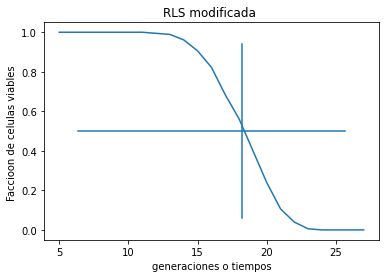

In [ ]:
plt.plot(l,viab) # esta graficando los datos vs sus posiciones (0,1,2,3)
plt.xlabel('generaciones o tiempos')
plt.ylabel('Faccioon de celulas viables ')
plt.title('RLS modificada ')
plt.axhline(y=0.5, xmin=0.1, xmax=0.9)
plt.axvline(x=18.2, ymin=0.1, ymax=0.9)
plt.show() #mostar el grafico 

In [ ]:
l=[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]# lista de tiempos en los que se grafica 
d=[] # lista donde se van a guardar los datos de las celulas viables 
for i in l: # cuenta cuantas celulas estan vivas en cada momento 
  num=0 # contador 
  for j in p:
    #print('i=',i,'j=',j)
    if j>i:
      num=num+1
      #print(num)
  d.append(num)
print(d)
for i in range(len(d)): # divide la cantidad de celulas para obtener la fraccion de celulas viables 
    d[i] /= len(listaobservada)
print(d)

[180, 180, 180, 180, 180, 180, 180, 180, 180, 178, 176, 171, 152, 127, 99, 63, 30, 12, 3, 0, 0, 0, 0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9888888888888889, 0.9777777777777777, 0.95, 0.8444444444444444, 0.7055555555555556, 0.55, 0.35, 0.16666666666666666, 0.06666666666666667, 0.016666666666666666, 0.0, 0.0, 0.0, 0.0]


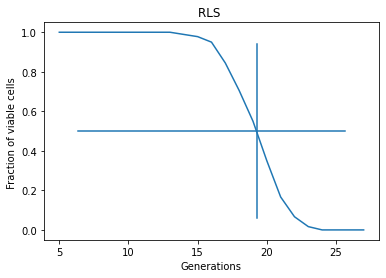

In [ ]:
plt.plot(l,d) # esta graficando los datos vs sus posiciones (0,1,2,3)
plt.xlabel('Generations')
plt.ylabel(' Fraction of viable cells  ')
plt.title('RLS ')
plt.axhline(y=0.5, xmin=0.1, xmax=0.9)
plt.axvline(x=19.3, ymin=0.1, ymax=0.9)
plt.show() #mostar el grafico 

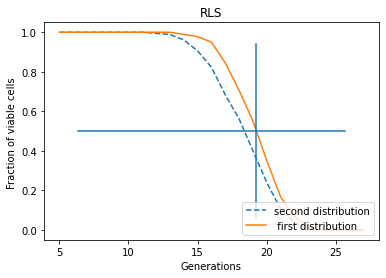

In [ ]:
plt.plot(l, viab, '--', label='second distribution')# con distribucion de edades 
plt.plot(l, d, label=' first distribution')# virgenes sin distribucion 
plt.title('RLS')
plt.ylabel('Fraction of viable cells ')
plt.xlabel('Generations')
plt.axhline(y=0.5, xmin=0.1, xmax=0.9)
plt.axvline(x=19.2, ymin=0.1, ymax=0.9)
plt.legend(loc=4)
plt.show()

Comparacion con los datos de David 

In [ ]:
x=[0,11,12,13,14,15,16,17,18,19,21,25,26,27,28,35]
xmed=sum(x)/len(x)
print(xmed)
y=[1,1,1,1,1,0.96,0.79,0.58,0.51,0.40,0.34,0,0,0,0,0]

18.5625


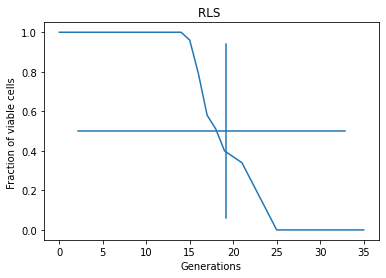

In [ ]:
plt.plot(x,y) # esta graficando los datos vs sus posiciones (0,1,2,3)
plt.xlabel('Generations')
plt.ylabel(' Fraction of viable cells  ')
plt.title('RLS ')
plt.axhline(y=0.5, xmin=0.1, xmax=0.9)
plt.axvline(x=19.2, ymin=0.1, ymax=0.9)
plt.show() #mostar el grafico 

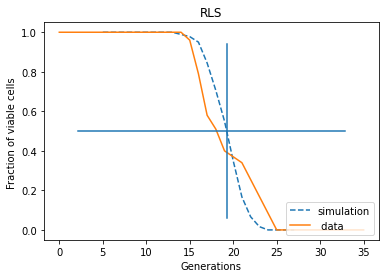

18.5625


In [ ]:
plt.plot(l, d, '--', label='simulation') # rla sin modificar virgenes 
plt.plot(x, y, label=' data ')
plt.title('RLS')
plt.ylabel('Fraction of viable cells ')
plt.xlabel('Generations')
plt.legend(loc=4)
plt.axhline(y=0.5, xmin=0.1, xmax=0.9)
plt.axvline(x=19.3, ymin=0.1, ymax=0.9)
plt.show()
lmed=sum(l)/len(l)
print(xmed)

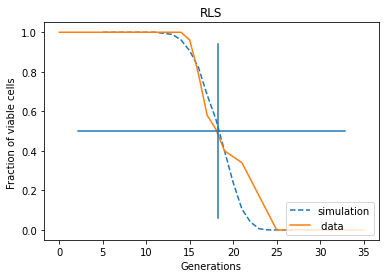

In [ ]:
plt.plot(l, viab, '--', label='simulation')# rls modificada con la distribucion 
plt.plot(x, y, label=' data ')
plt.title('RLS')
plt.ylabel('Fraction of viable cells ')
plt.xlabel('Generations')
plt.legend(loc=4)
plt.axhline(y=0.5, xmin=0.1, xmax=0.9)
plt.axvline(x=18.2, ymin=0.1, ymax=0.9)
plt.show()

popt [10.01643518 -0.54299728] pcov [[ 1.54072518 -0.08542983]
 [-0.08542983  0.00478655]]


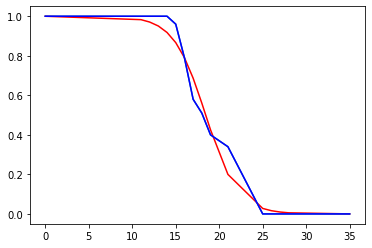

In [ ]:
xa=np.array(x)
ya=np.array(y)
def fsigmoid(x,a,b):
  return np.exp(a+b*x)/( 1+ np.exp(a+b*x))
xdata = np.linspace(0, 35, 35)
ydata = np.random.normal(size=len(xdata))
popt, pcov = curve_fit(fsigmoid, xa, ya)
a=curve_fit(fsigmoid,xa,ya)
print('popt',popt,'pcov', pcov)
plt.figure()
plt.plot(xa, fsigmoid(xa, *popt), 'r-', label='fit')
plt.plot(x,y)
plt.plot(xa, ya, 'b-', label='data')
plt.show()

#-------------------------------------------------------------

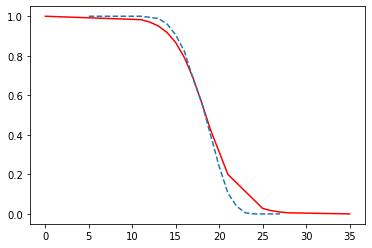

In [ ]:
plt.plot(xa, fsigmoid(xa, *popt), 'r-', label='fit')
plt.plot(l, viab, '--', label='simulation')

In [ ]:
mind_xa=sum(xa)/len(xa)
print(mind_xa)

18.5625


In [ ]:
error=[]
for i in range(len(xa)):
  #r_1=fsigmoid(xa[i],10.01643518,-0.54299728)
  r_1=ya[i]
  r_t=(r_1-viab[i])**2
  error.append(r_t)
print(error)
print(sum(error))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.001600000000000003, 0.044099999999999986, 0.17176419753086425, 0.2293345679012346, 0.31484567901234567, 0.31985308641975313, 0.6760493827160493, 0.46694444444444444, 0.31484567901234567, 0.16000000000000003, 0.057067901234567904]
2.756404938271605


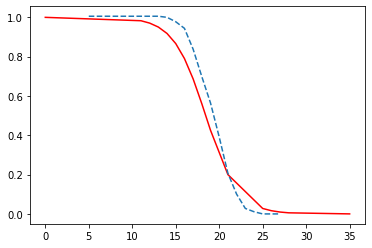

In [ ]:
plt.plot(xa, fsigmoid(xa, *popt), 'r-', label='fit') #sin modificar 
plt.plot(l, d, '--', label='simulation')

In [ ]:
error=[]
for i in range(len(xa)):
  #r_1=fsigmoid(xa[i],10.01643518,-0.54299728)
  r_1=ya[i]
  r_t=(r_1-d[i])**2
  error.append(r_t)
print(error)
print(sum(error))

[3.12100121719053e-05, 3.12100121719053e-05, 3.12100121719053e-05, 3.12100121719053e-05, 3.12100121719053e-05, 0.0020781373864735887, 0.04647757872725571, 0.1811239474423396, 0.24560607034736748, 0.36, 0.4066021534908398, 0.8913891576417714, 0.7022252738678568, 0.4876564401860117, 0.3183733341656003, 0.15292905964233325]
3.794617202958709
